Data preprocessing and understanding

   COMPREHENSIVE FITNESS POSE ANALYSIS
Loaded: 1423 rows, 101 columns
Exercises: ['Knee', 'Shoulder', 'Lateral', 'Leg', 'Glute']
Phases: ['Raises Down', 'Raises Up', 'Press Up', 'Press Down', 'Flexion Up', 'Leg Raises Up', 'Bridge Down', 'Leg Raises Down', 'Bridge Up']

Checking for duplicates...
   No duplicates by 'filename'
   No full-row duplicates
   No duplicates found. Size: 1423 rows

Checking for missing values (NaN)...
   Total cells: 145146
   Missing values: 0 (0.000%)
   No missing values found
EXERCISE DISTRIBUTION


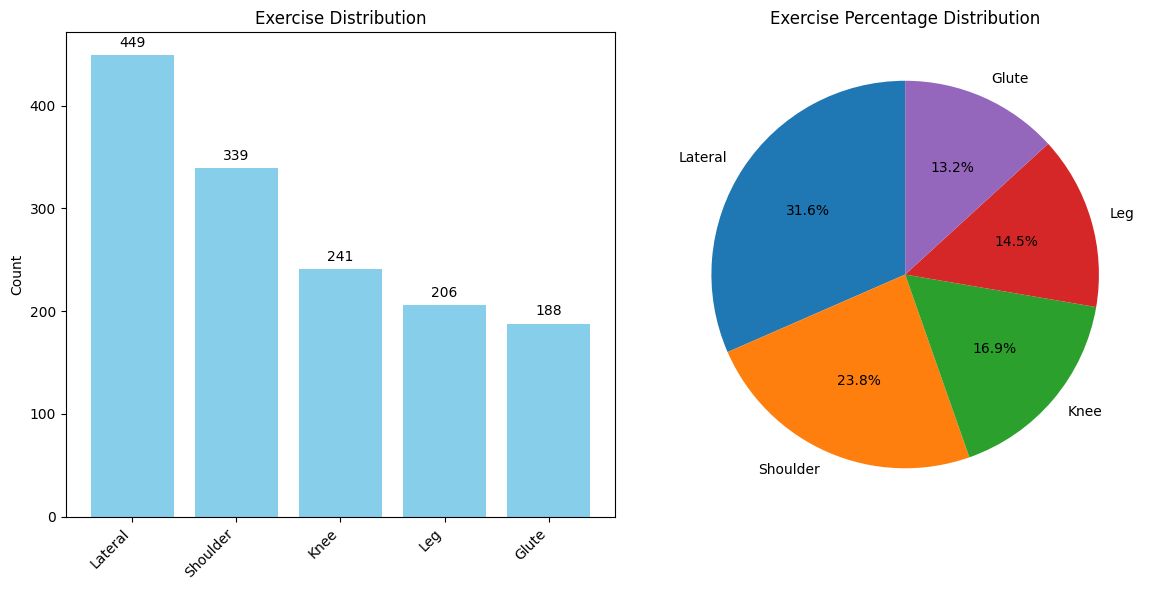


Exercise Statistics:
  Lateral: 449 (31.6%)
  Shoulder: 339 (23.8%)
  Knee: 241 (16.9%)
  Leg: 206 (14.5%)
  Glute: 188 (13.2%)
PHASE DISTRIBUTION


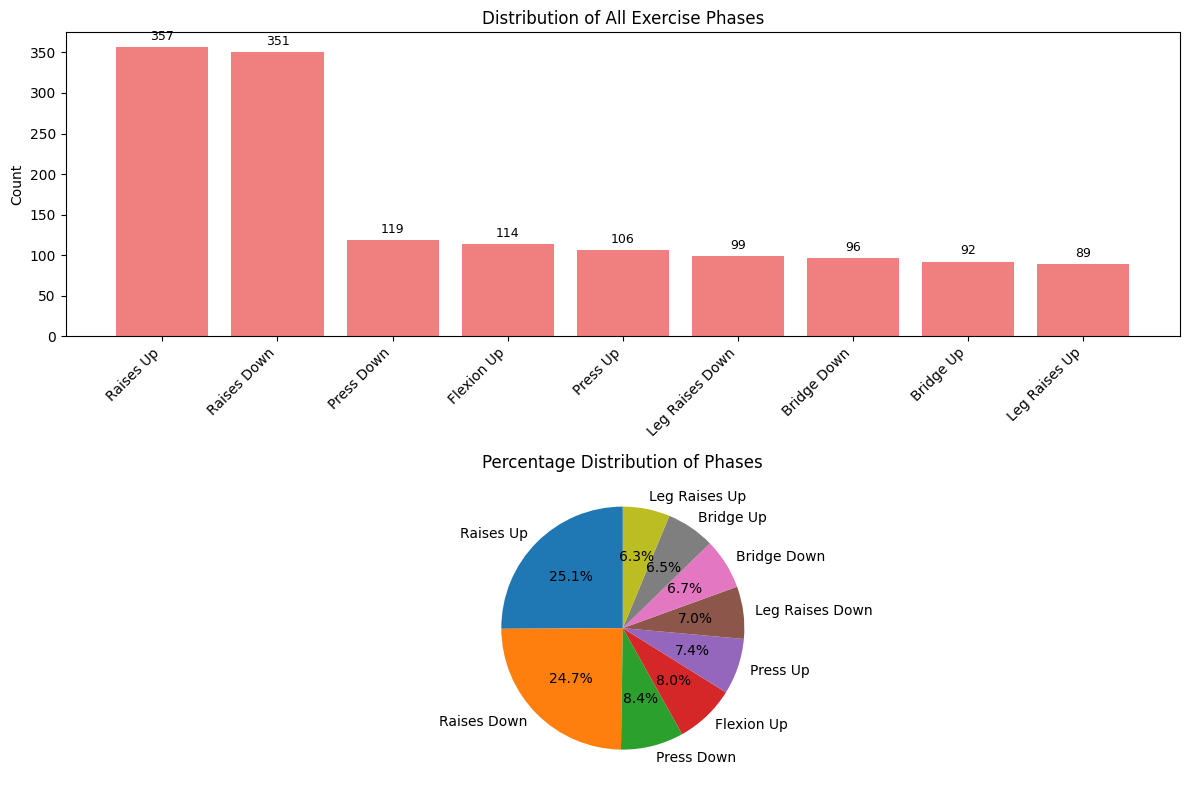


Phase Statistics:
  Raises Up: 357 (25.1%)
  Raises Down: 351 (24.7%)
  Press Down: 119 (8.4%)
  Flexion Up: 114 (8.0%)
  Press Up: 106 (7.4%)
  Leg Raises Down: 99 (7.0%)
  Bridge Down: 96 (6.7%)
  Bridge Up: 92 (6.5%)
  Leg Raises Up: 89 (6.3%)
PHASE DISTRIBUTION PER EXERCISE


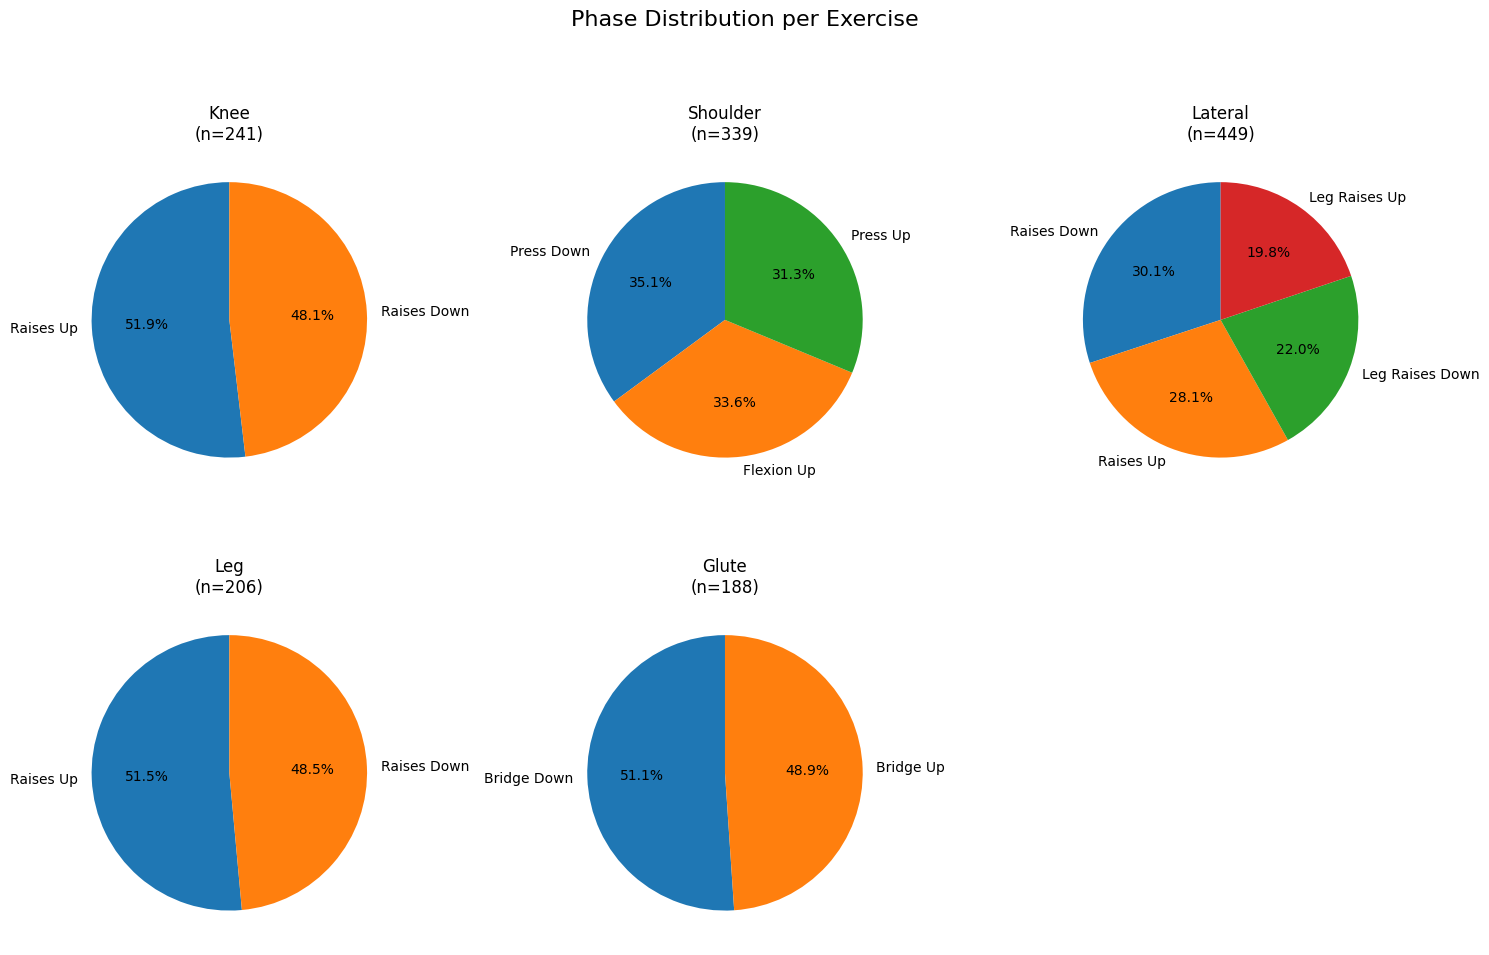

KEYPOINT STATISTICS


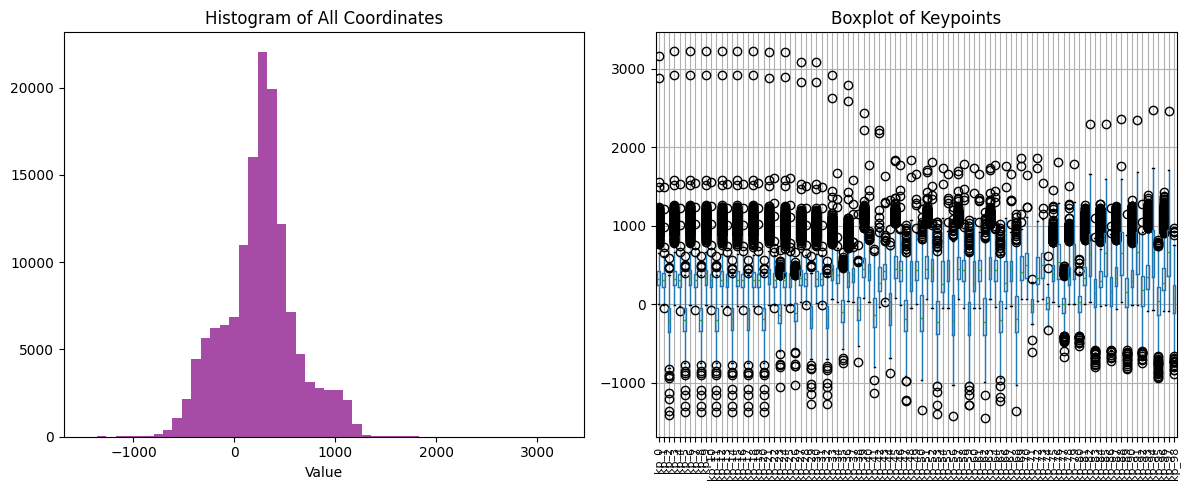


Cleaned data saved to: fitness_poses_cleaned.csv
Final dataset size: (1423, 102)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 1. DUPLICATE CHECK

def check_duplicates(df):
    """Checks for and removes duplicate rows."""
    initial_shape = df.shape
    print(f"\nChecking for duplicates...")

    # Check for duplicates by filename
    dup_by_filename = df.duplicated(subset=['filename'], keep='first')
    dup_count_filename = dup_by_filename.sum()
    if dup_count_filename > 0:
        print(f"   Found {dup_count_filename} duplicate(s) by 'filename'")
        df = df.drop_duplicates(subset=['filename'], keep='first')
    else:
        print(f"   No duplicates by 'filename'")

    # Check for full row duplicates
    dup_full = df.duplicated(keep='first')
    dup_count_full = dup_full.sum()
    if dup_count_full > 0:
        print(f"   Found {dup_count_full} full-row duplicate(s)")
        df = df.drop_duplicates(keep='first')
    else:
        print(f"   No full-row duplicates")

    # Calculate and display results
    final_shape = df.shape
    removed = initial_shape[0] - final_shape[0]
    if removed > 0:
        print(f"   Removed {removed} duplicate(s)")
        print(f"   New size: {final_shape[0]} rows")
    else:
        print(f"   No duplicates found. Size: {final_shape[0]} rows")
    return df


# 2. MISSING VALUES CHECK (NaN)

def check_missing_values(df):
    """Checks for missing values and fills them."""
    print(f"\nChecking for missing values (NaN)...")

    # Calculate total missing values and percentage
    total_nan = df.isnull().sum().sum()
    total_cells = df.size
    nan_percent = (total_nan / total_cells) * 100

    print(f"   Total cells: {total_cells}")
    print(f"   Missing values: {total_nan} ({nan_percent:.3f}%)")

    # If no missing values, return early
    if total_nan == 0:
        print(f"   No missing values found")
        return df

    print(f"\n   Filling missing values...")

    # Fill missing values in keypoint columns with column means
    kp_cols = [c for c in df.columns if c.startswith('kp_')]
    if kp_cols:
        print(f"   Filling {len(kp_cols)} keypoint columns with column means")
        df[kp_cols] = df[kp_cols].fillna(df[kp_cols].mean())

    # Fill missing values in categorical columns
    df['filename'] = df['filename'].fillna('unknown.jpg')
    df['exercise'] = df['exercise'].fillna('Unknown')
    df['phase'] = df['phase'].fillna('Unknown')

    # Calculate how many values were filled
    filled = total_nan - df.isnull().sum().sum()
    print(f"   Filled {filled} value(s)")
    return df


# 3. DATA LOADING & PREPROCESSING

def load_and_prepare_data(file_path):
    # Load data from CSV file
    df = pd.read_csv(file_path)
    print(f"Loaded: {df.shape[0]} rows, {df.shape[1]} columns")

    # Rename columns for better readability
    df.columns = ['filename', 'exercise_phase'] + [f'kp_{i}' for i in range(df.shape[1] - 2)]

    # Split exercise_phase column into separate exercise and phase columns
    df[['exercise', 'phase']] = df['exercise_phase'].str.split('_', n=1, expand=True)
    df['exercise'] = df['exercise'].str.replace('_', ' ').str.title()
    df['phase'] = df['phase'].str.replace('_', ' ').str.title()

    # Drop the original combined column
    df = df.drop('exercise_phase', axis=1)

    # Display unique exercises and phases found
    print(f"Exercises: {df['exercise'].unique().tolist()}")
    print(f"Phases: {df['phase'].unique().tolist()}")

    # Perform data quality checks
    df = check_duplicates(df)
    df = check_missing_values(df)
    return df


# 4. PHASE DISTRIBUTION VISUALIZATION

def plot_phase_distribution(df):
    """Visualizes distribution of all exercise phases"""
    # Count occurrences of each phase
    phase_counts = df['phase'].value_counts()

    plt.figure(figsize=(12, 8))

    # Bar chart for phases
    plt.subplot(2, 1, 1)
    bars = plt.bar(phase_counts.index, phase_counts.values, color='lightcoral')
    plt.title('Distribution of All Exercise Phases')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

    # Pie chart for phases
    plt.subplot(2, 1, 2)
    plt.pie(phase_counts.values, labels=phase_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Percentage Distribution of Phases')

    plt.tight_layout()
    plt.show()

    # Print phase statistics
    print("\nPhase Statistics:")
    for phase, count in phase_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {phase}: {count} ({percentage:.1f}%)")


# 5. EXERCISE DISTRIBUTION VISUALIZATION

def plot_exercise_distribution(df):
    """Visualizes distribution of exercises"""
    # Count occurrences of each exercise
    exercise_counts = df['exercise'].value_counts()

    plt.figure(figsize=(12, 6))

    # Bar chart for exercises
    plt.subplot(1, 2, 1)
    bars = plt.bar(exercise_counts.index, exercise_counts.values, color='skyblue')
    plt.title('Exercise Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

    # Pie chart for exercises
    plt.subplot(1, 2, 2)
    plt.pie(exercise_counts.values, labels=exercise_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Exercise Percentage Distribution')

    plt.tight_layout()
    plt.show()

    # Print exercise statistics
    print("\nExercise Statistics:")
    for exercise, count in exercise_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {exercise}: {count} ({percentage:.1f}%)")


# 6. PHASE DISTRIBUTION PER EXERCISE

def plot_phase_per_exercise(df):
    """Shows phase distribution for each exercise"""
    exercises = df['exercise'].unique()

    # Calculate grid dimensions for subplots
    n_exercises = len(exercises)
    cols = 3
    rows = (n_exercises + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if n_exercises > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Create pie chart for each exercise
    for idx, exercise in enumerate(exercises):
        # Filter data for current exercise
        exercise_data = df[df['exercise'] == exercise]
        phase_counts = exercise_data['phase'].value_counts()

        # Create pie chart if data exists
        if not phase_counts.empty:
            axes[idx].pie(phase_counts.values,
                         labels=phase_counts.index,
                         autopct='%1.1f%%',
                         startangle=90)
            axes[idx].set_title(f'{exercise}\n(n={len(exercise_data)})')
        else:
            # Display message if no data
            axes[idx].text(0.5, 0.5, 'No data',
                          ha='center', va='center',
                          transform=axes[idx].transAxes)
            axes[idx].set_title(f'{exercise}')

    # Hide empty subplots
    for j in range(idx + 1, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('Phase Distribution per Exercise', fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# 7. KEYPOINT STATISTICS

def plot_keypoint_stats(df):
    """Analyzes keypoint coordinate statistics"""
    # Get all keypoint columns
    kp_cols = [c for c in df.columns if c.startswith('kp_')]
    data = df[kp_cols].stack().reset_index(drop=True)

    plt.figure(figsize=(12, 5))

    # Histogram of all coordinate values
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=50, alpha=0.7, color='purple')
    plt.title('Histogram of All Coordinates')
    plt.xlabel('Value')

    # Boxplot of keypoint distributions
    plt.subplot(1, 2, 2)
    df[kp_cols].boxplot(figsize=(12, 6))
    plt.title('Boxplot of Keypoints')
    plt.xticks(rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()


# 8. MAIN ANALYSIS

def analyze_fitness_poses(file_path):
    """Main analysis function - orchestrates the entire data analysis process"""

    print("   COMPREHENSIVE FITNESS POSE ANALYSIS")


    # 1. Load and prepare data
    df = load_and_prepare_data(file_path)

    # 2. Analyze exercise distribution

    print("EXERCISE DISTRIBUTION")

    plot_exercise_distribution(df)

    # 3. Analyze phase distribution

    print("PHASE DISTRIBUTION")

    plot_phase_distribution(df)


    print("PHASE DISTRIBUTION PER EXERCISE")

    plot_phase_per_exercise(df)


    print("KEYPOINT STATISTICS")

    plot_keypoint_stats(df)

    # 6. Save cleaned dataset
    output_path = "fitness_poses_cleaned.csv"
    df.to_csv(output_path, index=False)
    print(f"\nCleaned data saved to: {output_path}")
    print(f"Final dataset size: {df.shape}")

    return df


# RUN ANALYSIS

if __name__ == "__main__":
    # Execute the analysis with the specified data file
    file_path = "fitness_poses_csvs_out_full_list.csv"
    df = analyze_fitness_poses(file_path)

The dataset demonstrates excellent quality with no duplicates or missing values in the 1423 records, with upper body exercises dominating with Lateral (31.6%) and Shoulder (23.8%) accounting for more than half of the data, and the phases of raises and downs dominating with Raises Up (25.1%) and Raises Down (24.7%) together covering almost 50% of the dataset. The dataset is well-structured and completely cleaned, making it ready for the next stage of work.